<a href="https://colab.research.google.com/github/jhonatanwsds/TelecomX_BR_Modelagem/blob/main/TelecomX_BR_Modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠️ Preparação dos Dados

Remoção de Colunas Irrelevantes

In [30]:
import pandas as pd

url_dados =  'https://raw.githubusercontent.com/jhonatanwsds/TelecomX_BR_Modelagem/refs/heads/main/dados_clientes_tratados.csv'

try:
      df = pd.read_csv(url_dados)
      print("Sucesso! O DataFrame 'df' foi criado a partir do link do GitHub.")

      display(df.head())

except Exception as e:
    print(f"Ocorreu um erro ao tentar carregar os dados: {e}")
    print("Verifique se a URL está correta e é o link para o arquivo 'Raw'.")

Sucesso! O DataFrame 'df' foi criado a partir do link do GitHub.


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [31]:

print("--- Análise Inicial do Arquivo Carregado ---")
print("\nInformações do DataFrame (info):")
df.info()

print("\nPrévia dos dados com a coluna 'customerID' (head):")
print(df.head())


coluna_para_remover = 'customerID'

print(f"\n--- Executando a Tarefa: Removendo a coluna '{coluna_para_remover}' ---")

if coluna_para_remover in df.columns:
    df.drop(columns=[coluna_para_remover], inplace=True)
    print(f"✅ Sucesso! A coluna '{coluna_para_remover}' foi removida.")
else:
    print(f"⚠️ Aviso: A coluna '{coluna_para_remover}' não foi encontrada. Talvez já tenha sido removida.")


print("\nColunas restantes no DataFrame:")
print(df.columns.to_list())

print("\nPrévia dos dados SEM a coluna 'customerID' (head):")
print(df.head())

--- Análise Inicial do Arquivo Carregado ---

Informações do DataFrame (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingM

Encoding

In [32]:
# --- Próxima Etapa: Converter colunas de texto (categóricas) para formato numérico ---

print("--- Iniciando a Etapa de Encoding ---")

# Identificar as colunas que são do tipo 'object' (texto)
colunas_categoricas = df.select_dtypes(include=['object']).columns
print(f"Colunas categóricas identificadas para encoding: {colunas_categoricas.to_list()}")


df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

print("\n✅ Sucesso! O encoding foi aplicado.")

# --- Verificação Final ---
print("\n--- Verificação Pós-Encoding ---")
print("Informações do DataFrame após o encoding (note que agora todas as colunas são numéricas):")
df_encoded.info()

print("\nPrévia do DataFrame transformado (note as novas colunas e a ausência de texto):")
pd.set_option('display.max_columns', None)
print(df_encoded.head())

df_encoded.to_csv('dados_prontos_para_modelagem.csv', index=False)
print("\n💾 O DataFrame final, pronto para a modelagem, foi salvo como 'dados_prontos_para_modelagem.csv'.")

--- Iniciando a Etapa de Encoding ---
Colunas categóricas identificadas para encoding: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

✅ Sucesso! O encoding foi aplicado.

--- Verificação Pós-Encoding ---
Informações do DataFrame após o encoding (note que agora todas as colunas são numéricas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null 

Verificação da Proporção de Evasão

In [33]:
print("--- Análise de Desequilíbrio da Variável 'Churn' ---")

contagem_churn = df_encoded['Churn'].value_counts()
print("\nContagem de clientes:")
print(f"Não evadiram (0): {contagem_churn[0]}")
print(f"Evadiram (1):     {contagem_churn[1]}")


proporcao_churn = df_encoded['Churn'].value_counts(normalize=True) * 100
print("\nProporção de clientes (%):")
print(f"Não evadiram (0): {proporcao_churn[0]:.2f}%")
print(f"Evadiram (1):     {proporcao_churn[1]:.2f}%")


if abs(proporcao_churn[0] - proporcao_churn[1]) > 30:
    print("\n⚠️ Alerta: As classes estão significativamente desbalanceadas.")
    print("Isso pode exigir técnicas de reamostragem (como SMOTE) antes de treinar o modelo.")
else:
    print("\n✅ As classes possuem um equilíbrio razoável para iniciar a modelagem.")

--- Análise de Desequilíbrio da Variável 'Churn' ---

Contagem de clientes:
Não evadiram (0): 5163
Evadiram (1):     1869

Proporção de clientes (%):
Não evadiram (0): 73.42%
Evadiram (1):     26.58%

⚠️ Alerta: As classes estão significativamente desbalanceadas.
Isso pode exigir técnicas de reamostragem (como SMOTE) antes de treinar o modelo.


Balanceamento de Classes (opcional )

In [34]:
!pip install imbalanced-learn

In [35]:
from imblearn.over_sampling import SMOTE
import pandas as pd


X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print("--- Composição Original das Classes ---")
print(y.value_counts(normalize=True) * 100)
print("\n")


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("--- Composição das Classes Após o SMOTE ---")
print(y_resampled.value_counts(normalize=True) * 100)
print("\n")

print(f"Formato original de X: {X.shape}")
print(f"Formato de X após reamostragem: {X_resampled.shape}")

--- Composição Original das Classes ---
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


--- Composição das Classes Após o SMOTE ---
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


Formato original de X: (7032, 31)
Formato de X após reamostragem: (10326, 31)


Normalização ou Padronização

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

print(f"Dados divididos em: {X_train.shape[0]} amostras de treino e {X_test.shape[0]} amostras de teste.")
print("-" * 50)

print("Iniciando a padronização dos dados...")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("✅ Dados de treino e teste padronizados com sucesso!")
print("-" * 50)


df_treino_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("Amostra dos dados de treino APÓS a padronização:")
display(df_treino_scaled.head())

Dados divididos em: 7228 amostras de treino e 3098 amostras de teste.
--------------------------------------------------
Iniciando a padronização dos dados...
✅ Dados de treino e teste padronizados com sucesso!
--------------------------------------------------
Amostra dos dados de treino APÓS a padronização:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Monthly,Total,Contas_Diarias,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.397445,-0.782045,-0.526767,-0.984930,0.334664,-1.219185,-1.698794,-0.901031,-1.698794,0.857320,-0.334664,-0.970550,-1.082532,2.246895,2.246895,-0.6245,2.246895,-0.769917,2.246895,-0.778832,2.246895,-0.638002,2.246895,-0.896322,2.246895,-0.900345,-0.487081,-0.460368,-0.524409,-0.972433,1.803959
1,-0.397445,1.278699,-0.526767,1.815255,-2.988072,-1.219185,-0.350606,0.965736,-0.350606,-1.166426,2.988072,-0.970550,-1.082532,-0.445059,-0.445059,-0.6245,-0.445059,1.298841,-0.445059,1.283974,-0.445059,1.567393,-0.445059,1.115670,-0.445059,1.110685,-0.487081,2.172177,-0.524409,-0.972433,-0.554336
2,2.516074,-0.782045,-0.526767,-0.943136,0.334664,0.820220,0.743702,-0.717732,0.743702,0.857320,-0.334664,-0.970550,0.923760,-0.445059,-0.445059,-0.6245,-0.445059,-0.769917,-0.445059,-0.778832,-0.445059,-0.638002,-0.445059,1.115670,-0.445059,1.110685,-0.487081,-0.460368,-0.524409,1.028349,-0.554336
3,-0.397445,-0.782045,-0.526767,-1.110311,0.334664,0.820220,-0.839106,-0.916635,-0.839106,0.857320,-0.334664,-0.970550,-1.082532,-0.445059,-0.445059,-0.6245,-0.445059,-0.769917,-0.445059,-0.778832,-0.445059,-0.638002,-0.445059,-0.896322,-0.445059,-0.900345,-0.487081,-0.460368,-0.524409,-0.972433,1.803959
4,-0.397445,-0.782045,-0.526767,-1.110311,0.334664,-1.219185,-0.217538,-0.908489,-0.217538,0.857320,-0.334664,1.030344,-1.082532,-0.445059,-0.445059,-0.6245,-0.445059,-0.769917,-0.445059,1.283974,-0.445059,1.567393,-0.445059,-0.896322,-0.445059,-0.900345,-0.487081,-0.460368,-0.524409,-0.972433,1.803959


## Modelagem Preditiva e Análise

Nesta seção, vamos treinar, avaliar e interpretar os modelos de machine learning para prever a evasão de clientes.

### 1. Treinamento dos Modelos

In [37]:
# Imports para a fase de modelagem
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Modelo 1: Regressão Logística ---
# As variáveis X_train_scaled e y_train já existem da sua célula anterior
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# --- Modelo 2: Random Forest ---
# As variáveis X_train e y_train já existem da sua célula anterior
rand_forest = RandomForestClassifier(random_state=42, n_estimators=100)
rand_forest.fit(X_train, y_train)

print("Modelos 'log_reg' e 'rand_forest' treinados com sucesso e prontos para avaliação.")

Modelos 'log_reg' e 'rand_forest' treinados com sucesso e prontos para avaliação.


### 2. Avaliação de Desempenho e Matrizes de Confusão

🎯 Correlação e Seleção de Variáveis

--- Avaliação: Regressão Logística ---

Relatório de Classificação (Regressão Logística):
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      1593
           1       0.79      0.83      0.81      1505

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



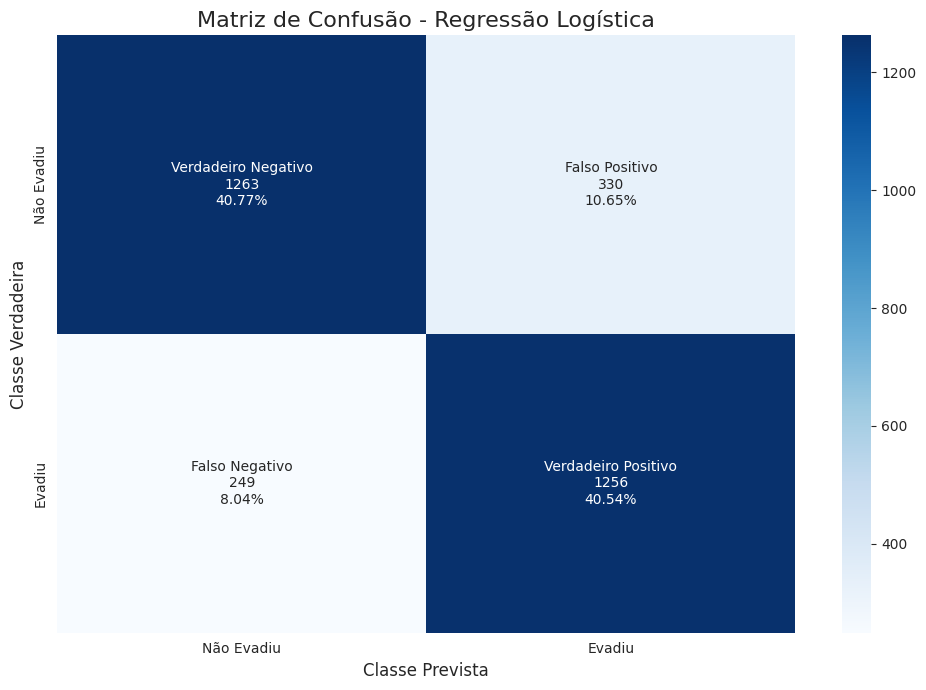



--- Avaliação: Random Forest ---

Relatório de Classificação (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1593
           1       0.83      0.85      0.84      1505

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



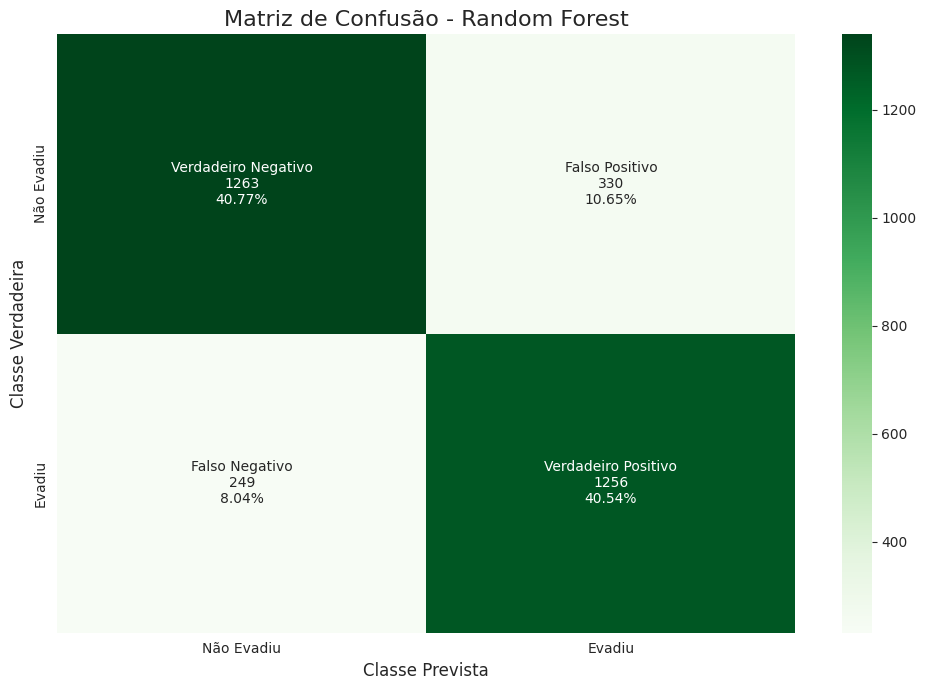

In [38]:
# --- Avaliação da Regressão Logística ---
print("--- Avaliação: Regressão Logística ---")
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("\nRelatório de Classificação (Regressão Logística):\n", classification_report(y_test, y_pred_log_reg))

# Matriz de Confusão Detalhada
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = [f"{value:0.0f}" for value in cm_log_reg.flatten()]
group_percentages = [f"{value:.2%}" for value in cm_log_reg.flatten()/np.sum(cm_log_reg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_log_reg, annot=labels, fmt='', cmap='Blues', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
plt.title('Matriz de Confusão - Regressão Logística', fontsize=16)
plt.ylabel('Classe Verdadeira', fontsize=12)
plt.xlabel('Classe Prevista', fontsize=12)
plt.tight_layout()
plt.show()


# --- Avaliação do Random Forest ---
print("\n\n--- Avaliação: Random Forest ---")
y_pred_rand_forest = rand_forest.predict(X_test)
print("\nRelatório de Classificação (Random Forest):\n", classification_report(y_test, y_pred_rand_forest))

# Matriz de Confusão Detalhada
cm_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rand_forest, annot=labels, fmt='', cmap='Greens', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
plt.title('Matriz de Confusão - Random Forest', fontsize=16)
plt.ylabel('Classe Verdadeira', fontsize=12)
plt.xlabel('Classe Prevista', fontsize=12)
plt.tight_layout()
plt.show()

### Análise Avançada de Desempenho (Curva ROC e Precisão-Recall)

Estes gráficos fornecem uma visão mais profunda da performance dos modelos, avaliando sua capacidade de distinguir entre as classes em diferentes limiares de decisão.

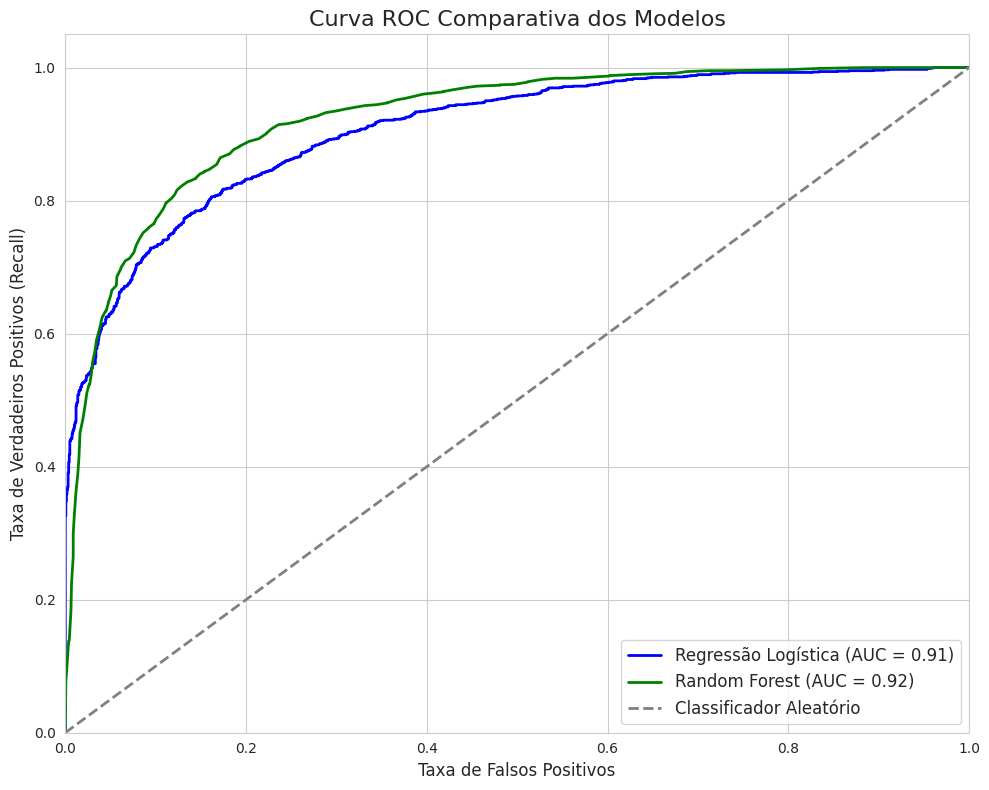

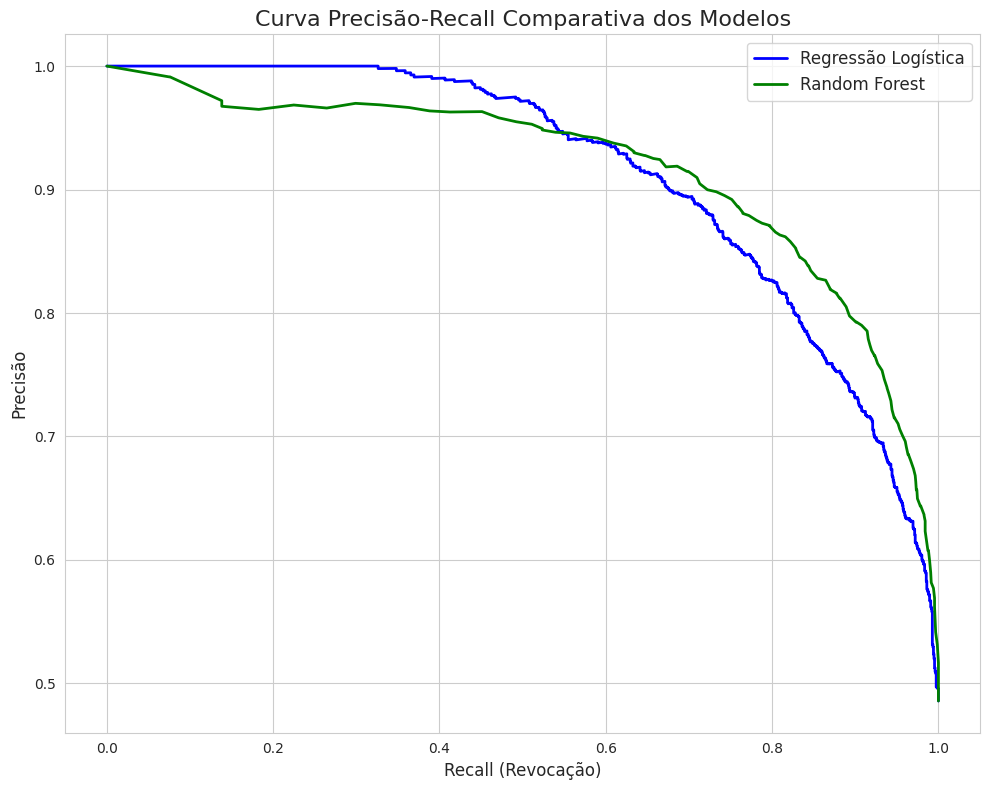

In [52]:
# --- Imports Adicionais para Avaliação ---
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# --- GRÁFICO 1: CURVA ROC COMPARATIVA ---

# Obter as probabilidades de previsão (os modelos 'log_reg' e 'rand_forest' já foram treinados nas células anteriores)
y_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
y_proba_rand_forest = rand_forest.predict_proba(X_test)[:, 1]

# Calcular pontos da curva ROC para ambos os modelos
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_log_reg)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rand_forest)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotar o gráfico
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Regressão Logística (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Classificador Aleatório')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12)
plt.title('Curva ROC Comparativa dos Modelos', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# --- GRÁFICO 2: CURVA PRECISÃO-RECALL COMPARATIVA ---

# Calcular pontos da curva para ambos os modelos
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_log_reg)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rand_forest)

# Plotar o gráfico
plt.figure(figsize=(10, 8))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Regressão Logística')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Random Forest')

plt.xlabel('Recall (Revocação)', fontsize=12)
plt.ylabel('Precisão', fontsize=12)
plt.title('Curva Precisão-Recall Comparativa dos Modelos', fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Análise das Variáveis Mais Relevantes

--- Gráfico: Top 20 Variáveis (Regressão Logística) ---


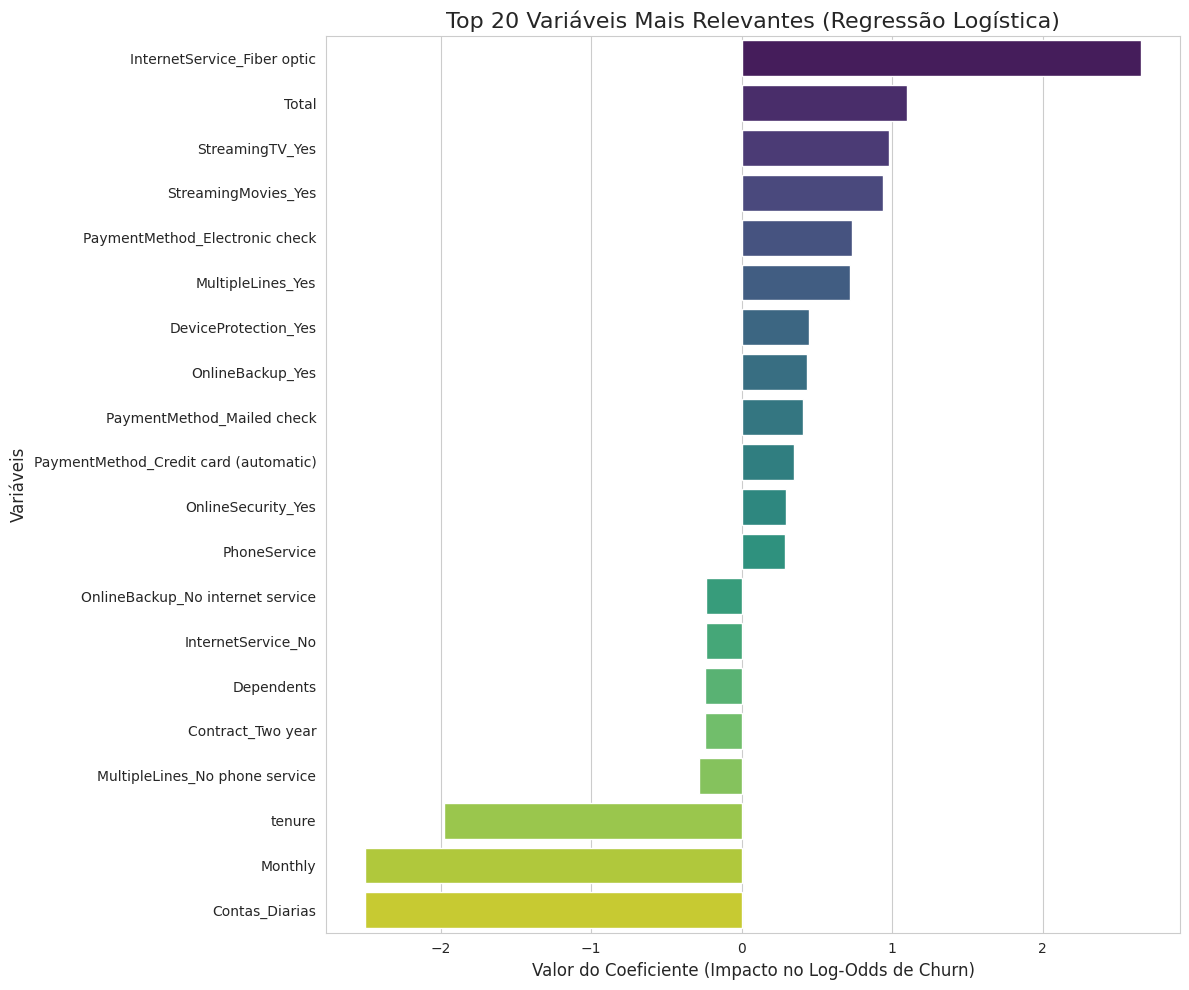

In [39]:
# --- Gráfico Aprimorado - Coeficientes da Regressão Logística ---
print("--- Gráfico: Top 20 Variáveis (Regressão Logística) ---")
coefs = pd.DataFrame(
    log_reg.coef_[0],
    columns=['Coeficiente'], index=X.columns
)
coefs['Importancia_Absoluta'] = coefs['Coeficiente'].abs()
top_20_coefs = coefs.sort_values(by='Importancia_Absoluta', ascending=False).head(20)
top_20_coefs = top_20_coefs.sort_values(by='Coeficiente', ascending=False)
plt.figure(figsize=(12, 10))
bars = sns.barplot(x=top_20_coefs['Coeficiente'], y=top_20_coefs.index, palette='viridis')
plt.title('Top 20 Variáveis Mais Relevantes (Regressão Logística)', fontsize=16)
plt.xlabel('Valor do Coeficiente (Impacto no Log-Odds de Churn)', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.tight_layout()
plt.show()


--- Gráfico: Top 20 Variáveis (Random Forest) ---


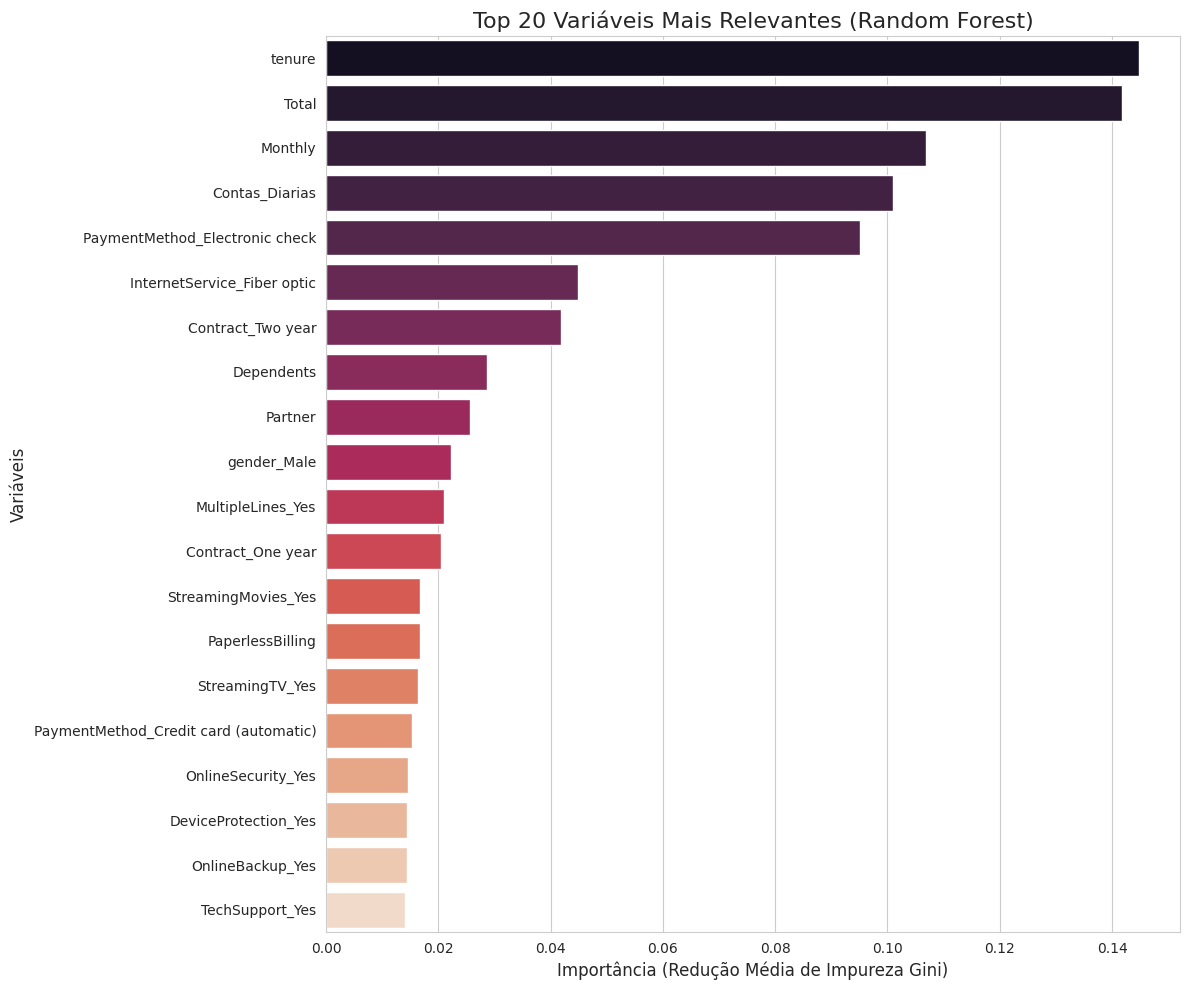

In [40]:
# --- Gráfico Aprimorado - Importância das Variáveis do Random Forest ---
print("\n--- Gráfico: Top 20 Variáveis (Random Forest) ---")
importances = pd.DataFrame(
    rand_forest.feature_importances_,
    columns=['Importância'], index=X.columns
)
top_20_importances = importances.sort_values(by='Importância', ascending=False).head(20)
plt.figure(figsize=(12, 10))
bars = sns.barplot(x=top_20_importances['Importância'], y=top_20_importances.index, palette='rocket')
plt.title('Top 20 Variáveis Mais Relevantes (Random Forest)', fontsize=16)
plt.xlabel('Importância (Redução Média de Impureza Gini)', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.tight_layout()
plt.show()

Análise de Correlação

Variável 'df_encoded' pronta para gerar o gráfico.


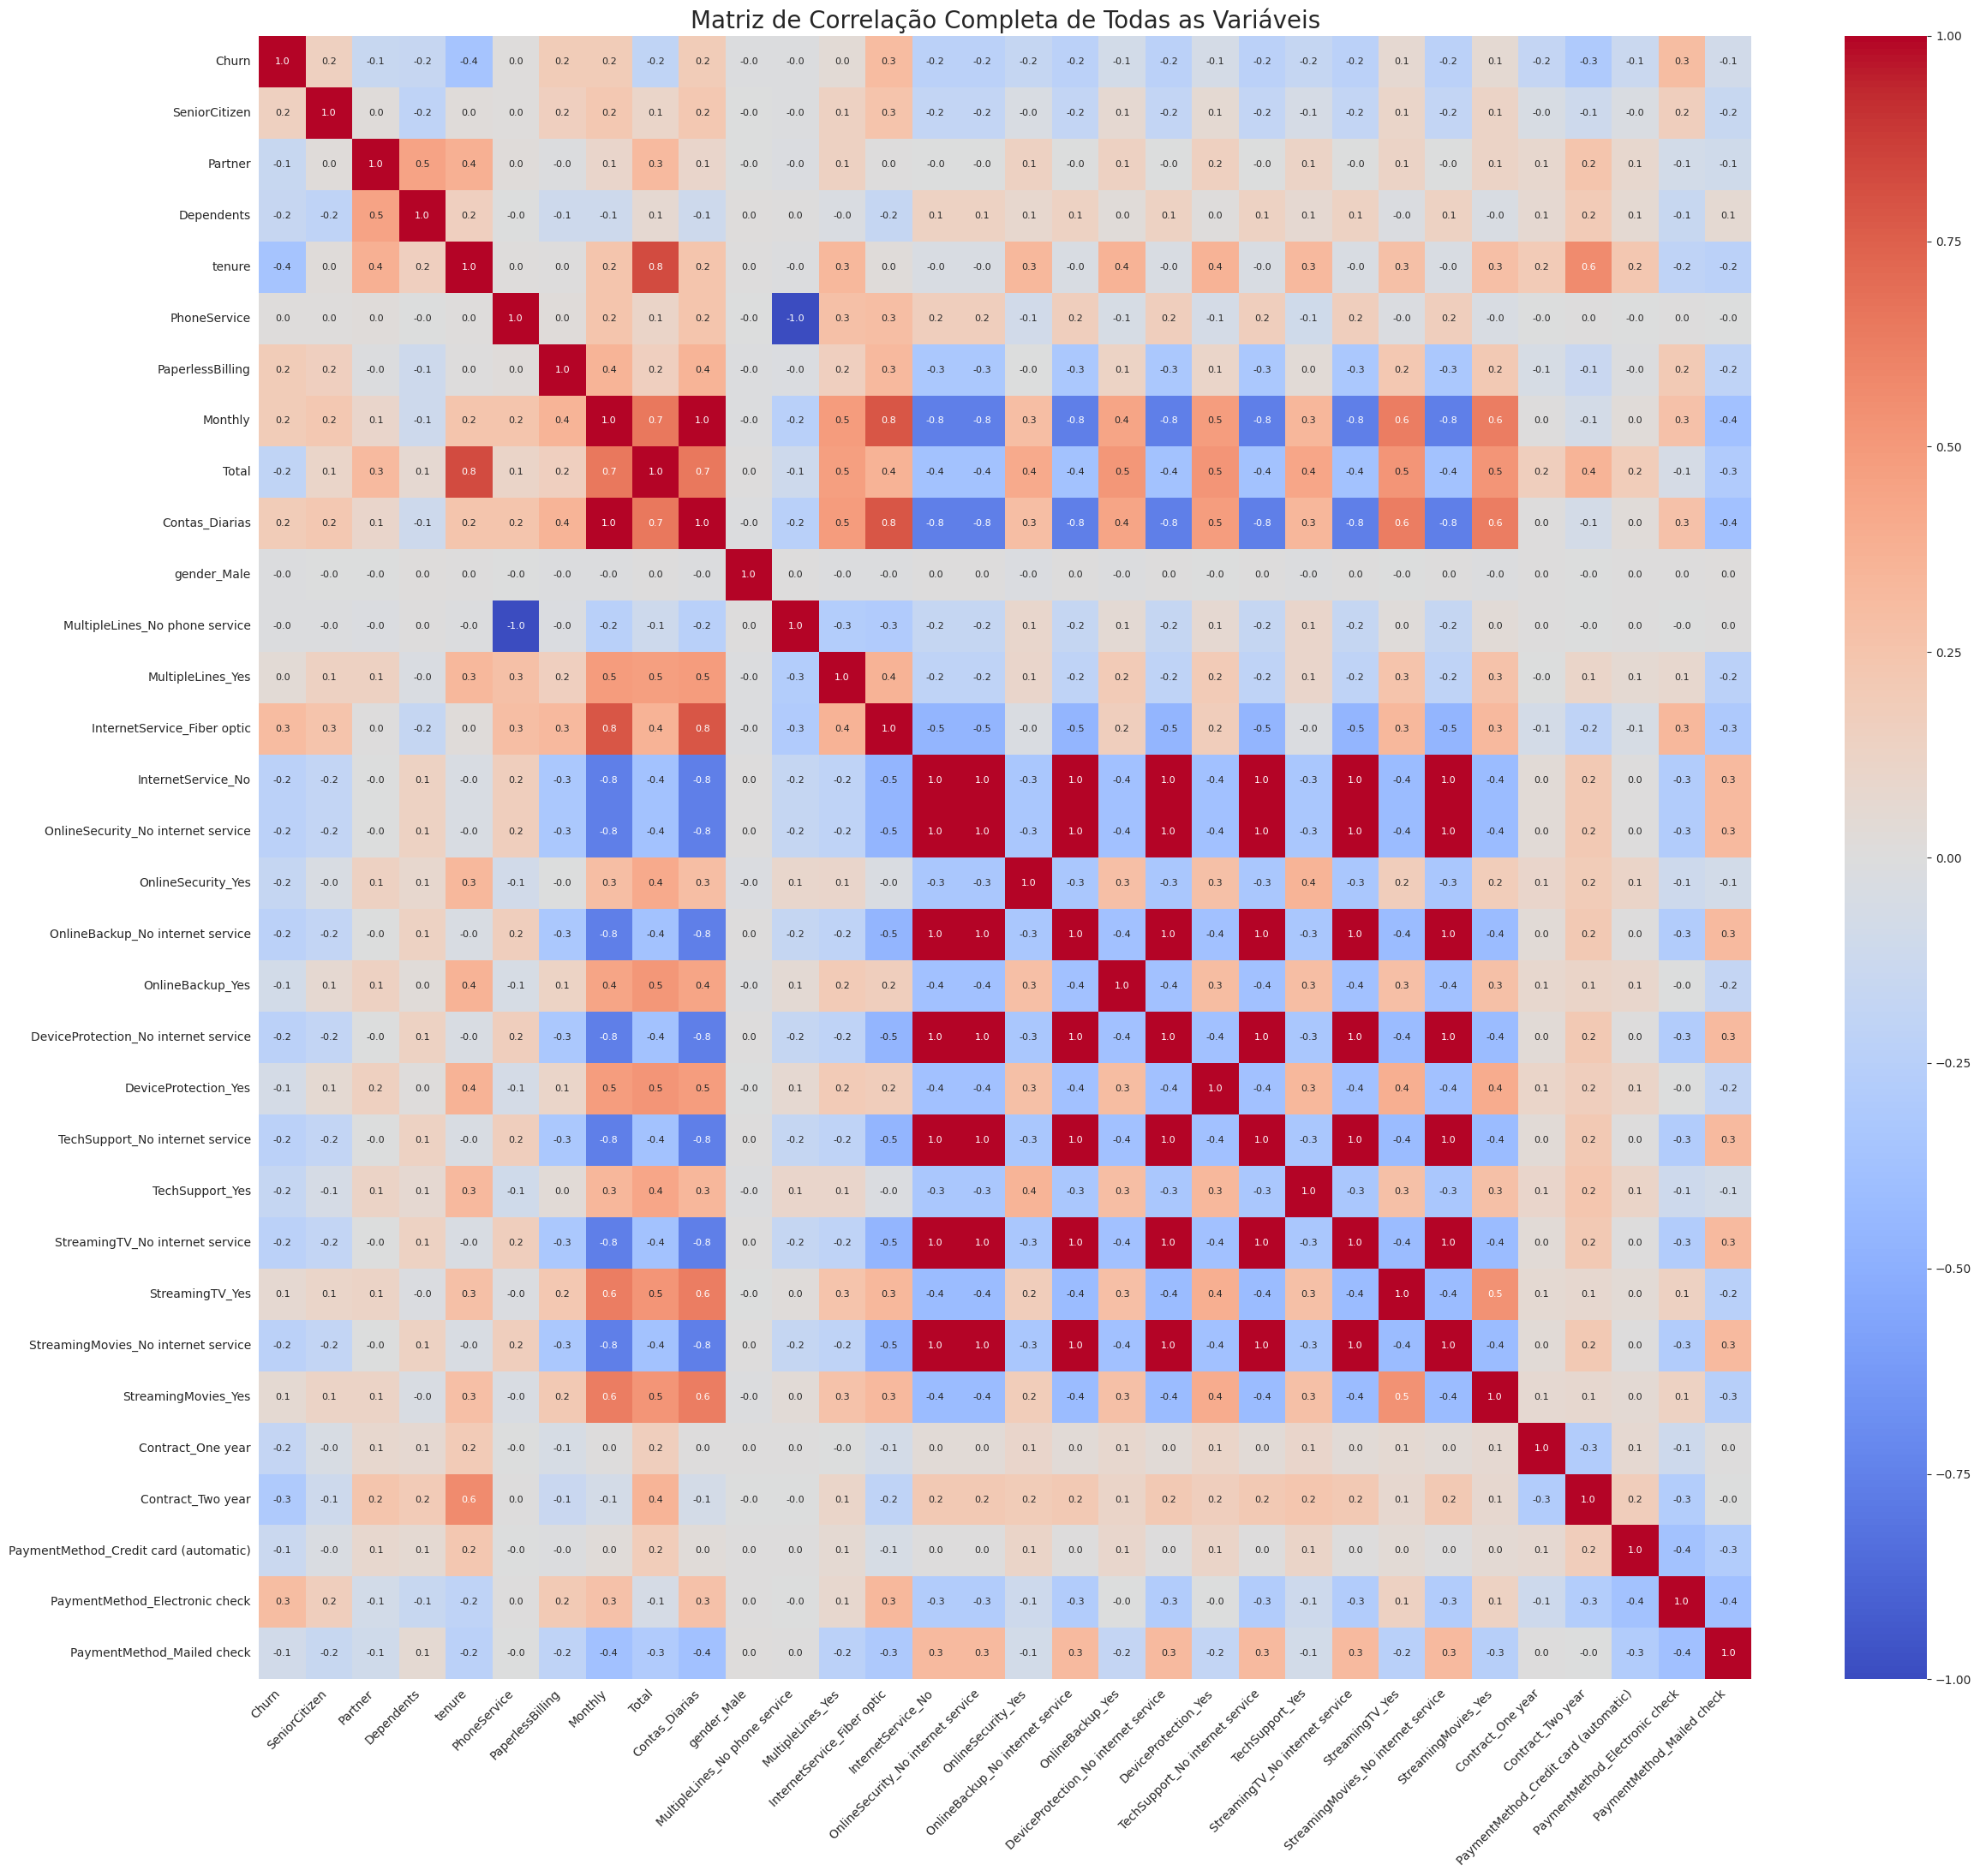

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


try:
    url_dados = 'https://raw.githubusercontent.com/jhonatanwsds/TelecomX_BR_Modelagem/refs/heads/main/dados_clientes_tratados.csv'
    df = pd.read_csv(url_dados)

    if 'customerID' in df.columns:
        df.drop(columns=['customerID'], inplace=True)

    colunas_categoricas = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
    print("Variável 'df_encoded' pronta para gerar o gráfico.")


    corr_matrix = df_encoded.corr()


    plt.figure(figsize=(25, 22))

    sns.heatmap(corr_matrix,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                annot_kws={"size": 8})

    plt.title('Matriz de Correlação Completa de Todas as Variáveis', fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocorreu um erro: {e}")

Correlações com Churn

In [42]:
print("--- Variáveis com Maior Correlação com Churn ---")

corr_churn = corr_matrix['Churn'].sort_values(ascending=False)

print(corr_churn)

--- Variáveis com Maior Correlação com Churn ---
Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
Contas_Diarias                           0.192858
Monthly                                  0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
T

Análises Direcionadas

Análise: Tempo de Contrato vs. Evasão

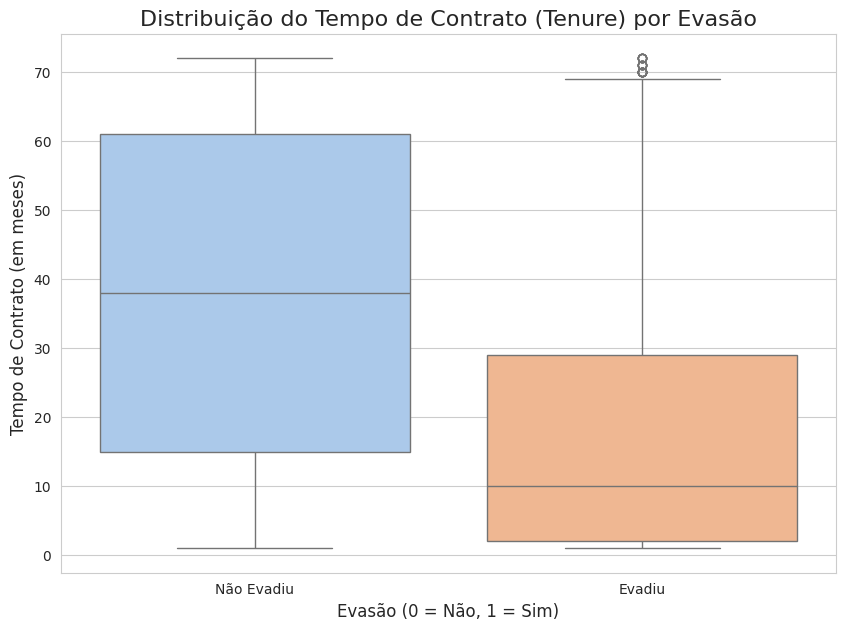

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='tenure', data=df_encoded, palette='pastel', hue='Churn', legend=False)

plt.title('Distribuição do Tempo de Contrato (Tenure) por Evasão', fontsize=16)
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Tempo de Contrato (em meses)', fontsize=12)
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu']) # Renomeia os ticks do eixo x

plt.show()

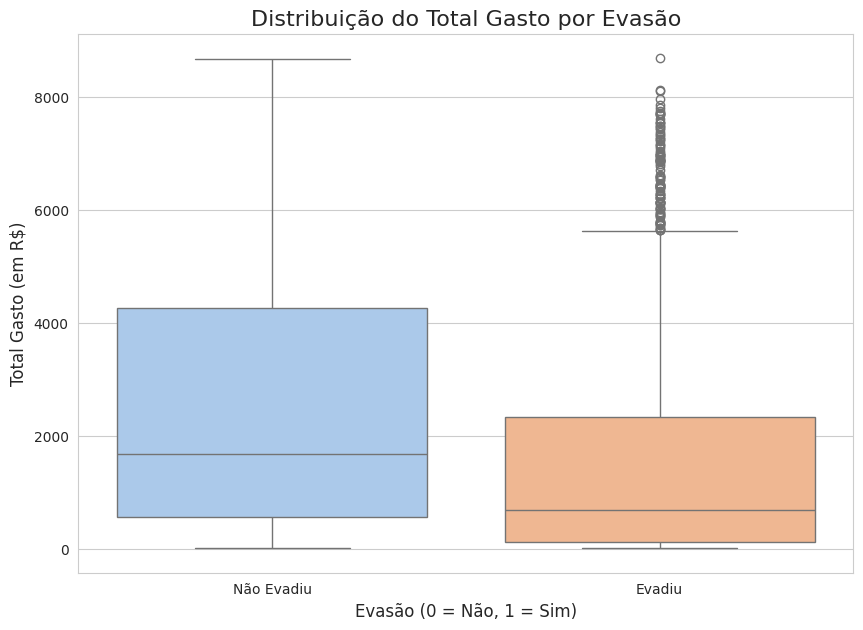

In [44]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='Total', data=df_encoded, palette='pastel', hue='Churn', legend=False)


plt.title('Distribuição do Total Gasto por Evasão', fontsize=16)
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Total Gasto (em R$)', fontsize=12)
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])

plt.show()

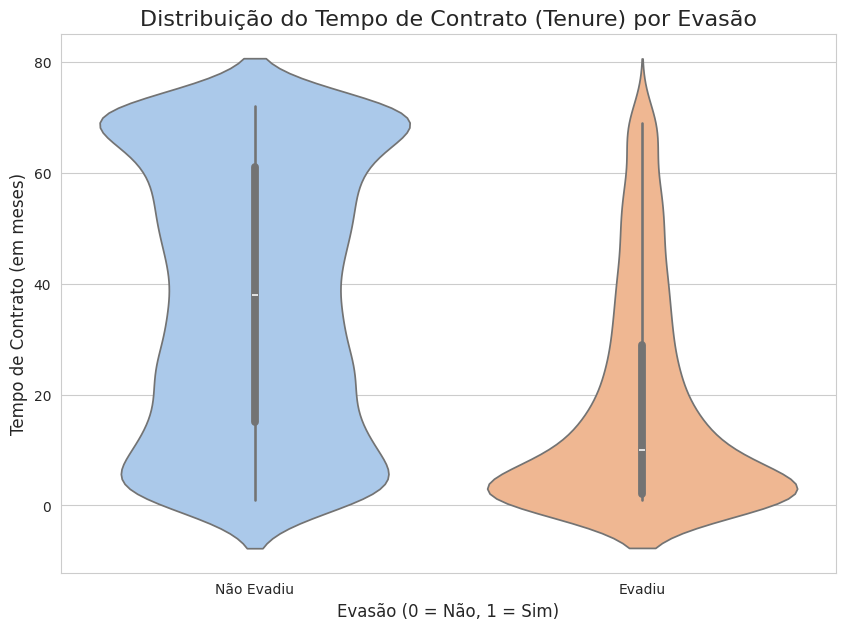

In [45]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='tenure', data=df_encoded, palette='pastel', hue='Churn', legend=False)

plt.title('Distribuição do Tempo de Contrato (Tenure) por Evasão', fontsize=16)
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Tempo de Contrato (em meses)', fontsize=12)
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])

plt.show()

In [46]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

print(f"Dados divididos em: {X_train.shape[0]} amostras de treino e {X_test.shape[0]} amostras de teste.")

Dados divididos em: 7228 amostras de treino e 3098 amostras de teste.


In [47]:
!pip install imbalanced-learn

--- Treinando e Avaliando: Regressão Logística ---

Relatório de Classificação (Regressão Logística):
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      1593
           1       0.79      0.83      0.81      1505

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



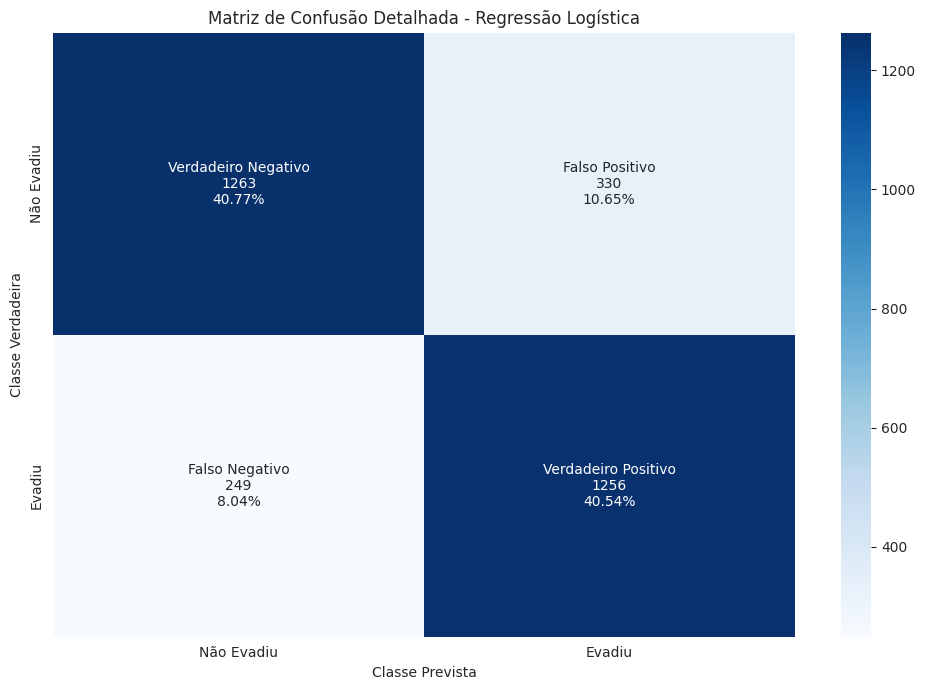



--- Treinando e Avaliando: Random Forest ---

Relatório de Classificação (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1593
           1       0.83      0.85      0.84      1505

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



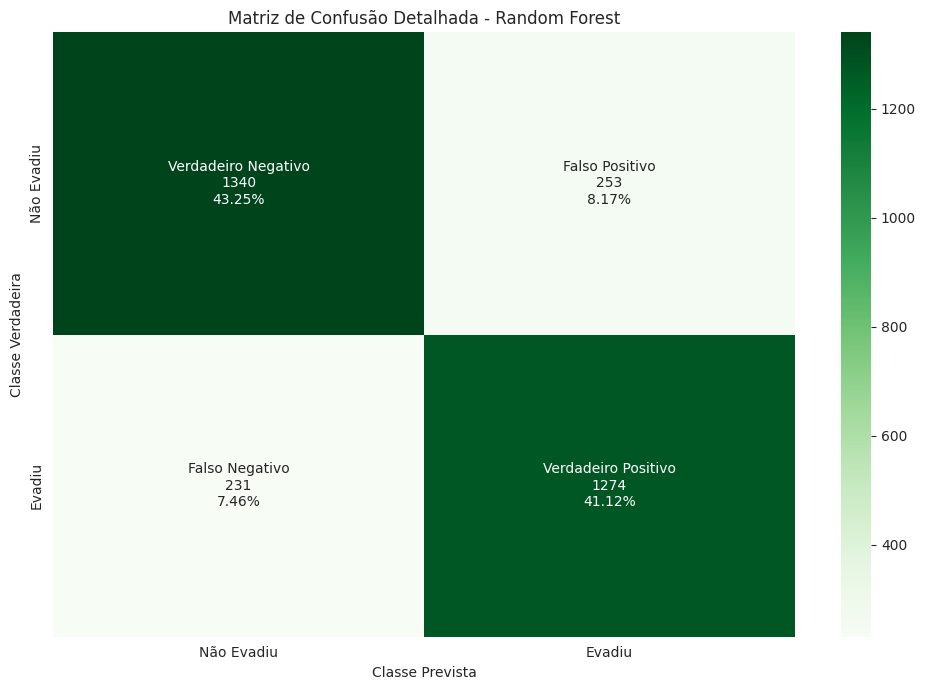

In [48]:
# --- 1. Instalação da biblioteca para balanceamento ---
!pip install -q imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignorar avisos para manter a saída limpa
warnings.filterwarnings('ignore')

# --- 2. Carregar os dados ---
try:
    df_encoded = pd.read_csv('dados_prontos_para_modelagem.csv')

    # --- 3. Separar e Balancear os Dados ---
    X = df_encoded.drop('Churn', axis=1)
    y = df_encoded['Churn']

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # --- 4. Dividir em Treino e Teste (70/30) ---
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=42
    )

    # --- 5. Padronizar os dados para a Regressão Logística ---
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- Modelo 1: Regressão Logística ---
    print("--- Treinando e Avaliando: Regressão Logística ---")
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log_reg = log_reg.predict(X_test_scaled)

    print("\nRelatório de Classificação (Regressão Logística):\n", classification_report(y_test, y_pred_log_reg))

    # Matriz de Confusão Detalhada
    cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
    group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
    group_counts = ["{0:0.0f}".format(value) for value in cm_log_reg.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm_log_reg.flatten()/np.sum(cm_log_reg)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_log_reg, annot=labels, fmt='', cmap='Blues', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.title('Matriz de Confusão Detalhada - Regressão Logística')
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Prevista')
    plt.tight_layout()
    plt.show()

    # --- Modelo 2: Random Forest ---
    print("\n\n--- Treinando e Avaliando: Random Forest ---")
    rand_forest = RandomForestClassifier(random_state=42, n_estimators=100)
    rand_forest.fit(X_train, y_train)
    y_pred_rand_forest = rand_forest.predict(X_test)

    print("\nRelatório de Classificação (Random Forest):\n", classification_report(y_test, y_pred_rand_forest))

    # Matriz de Confusão Detalhada
    cm_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)
    group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
    group_counts = ["{0:0.0f}".format(value) for value in cm_rand_forest.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm_rand_forest.flatten()/np.sum(cm_rand_forest)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_rand_forest, annot=labels, fmt='', cmap='Greens', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.title('Matriz de Confusão Detalhada - Random Forest')
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Prevista')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Erro: Arquivo 'dados_prontos_para_modelagem.csv' não encontrado.")
    print("Certifique-se de que as células anteriores do seu notebook foram executadas e o arquivo foi gerado.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Treinamento e Geração das Métricas


--- Gráfico 1: Matriz de Correlação ---


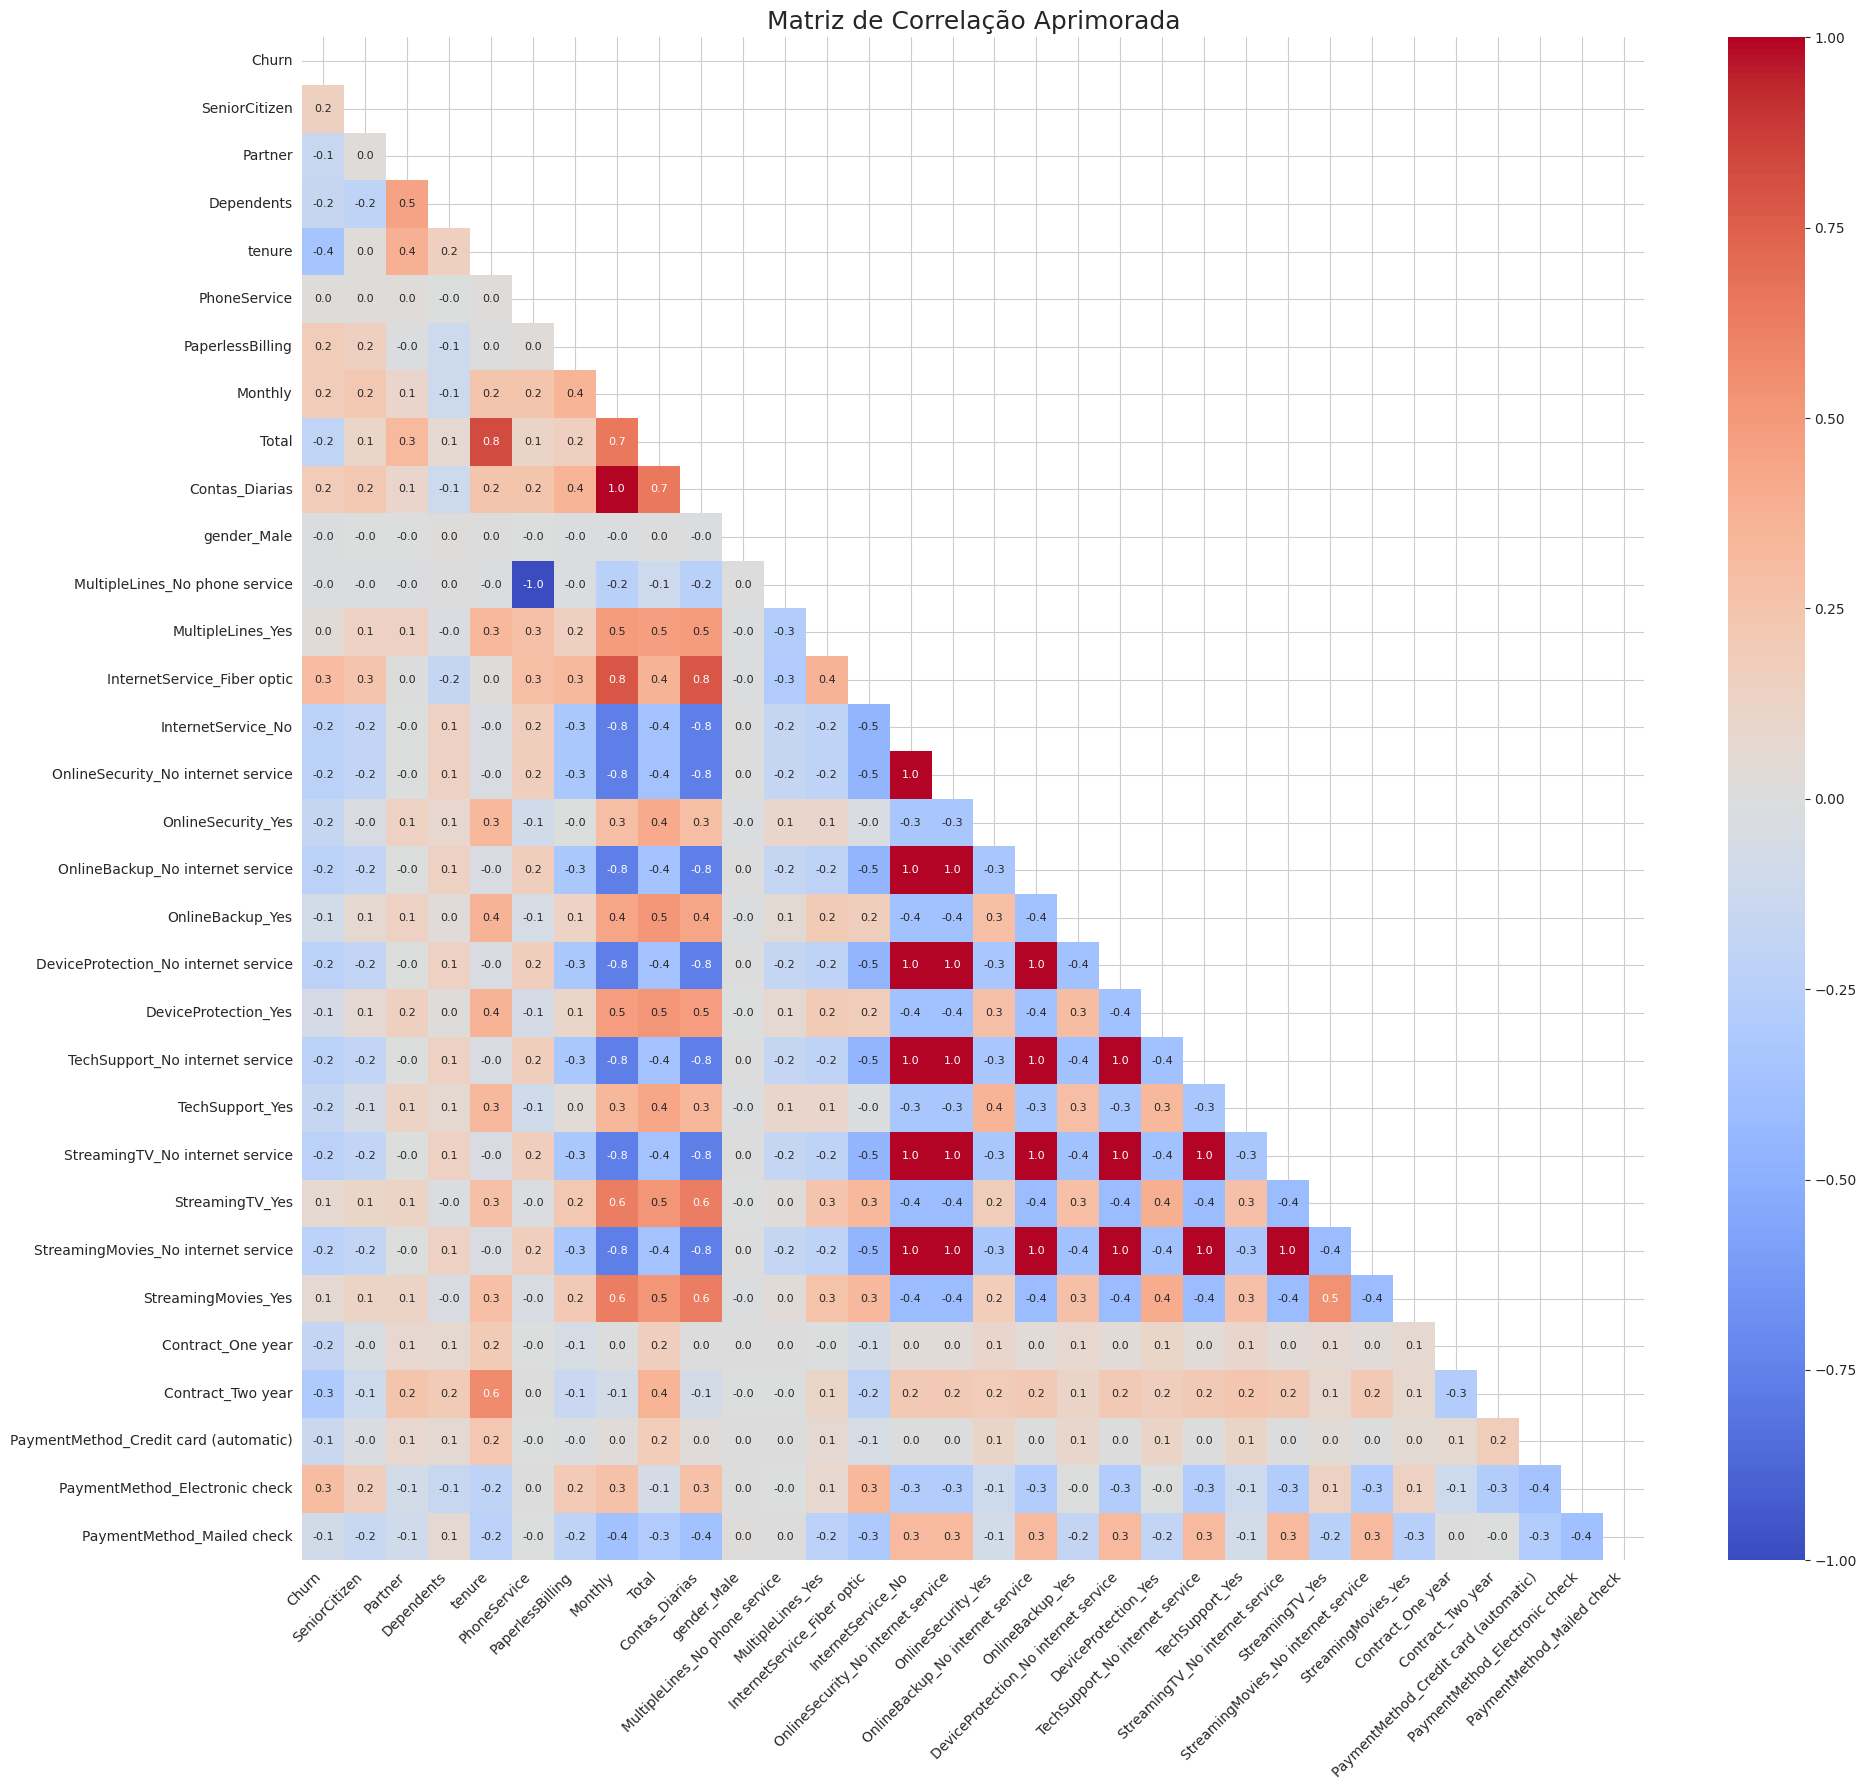



--- Avaliação: Regressão Logística ---

Relatório de Classificação (Regressão Logística):
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      1593
           1       0.79      0.83      0.81      1505

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098


--- Gráfico 2: Matriz de Confusão (Regressão Logística) ---


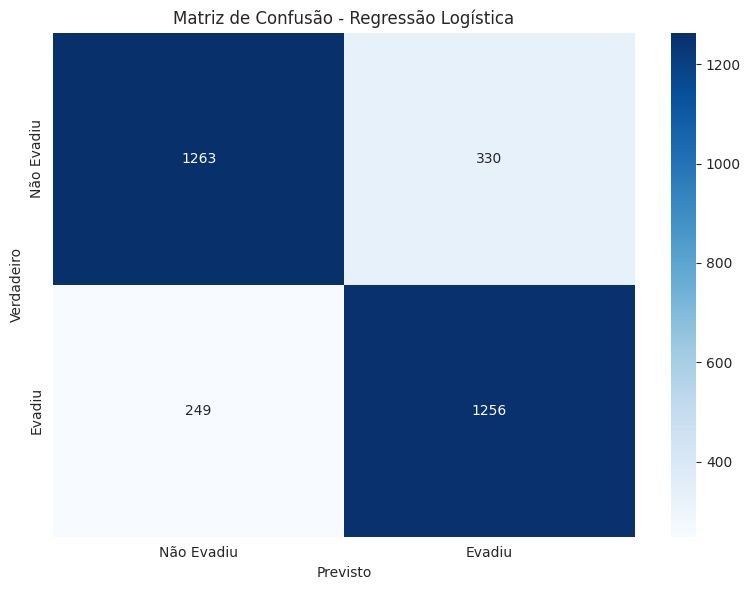



--- Avaliação: Random Forest ---

Relatório de Classificação (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1593
           1       0.83      0.85      0.84      1505

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098


--- Gráfico 3: Matriz de Confusão (Random Forest) ---


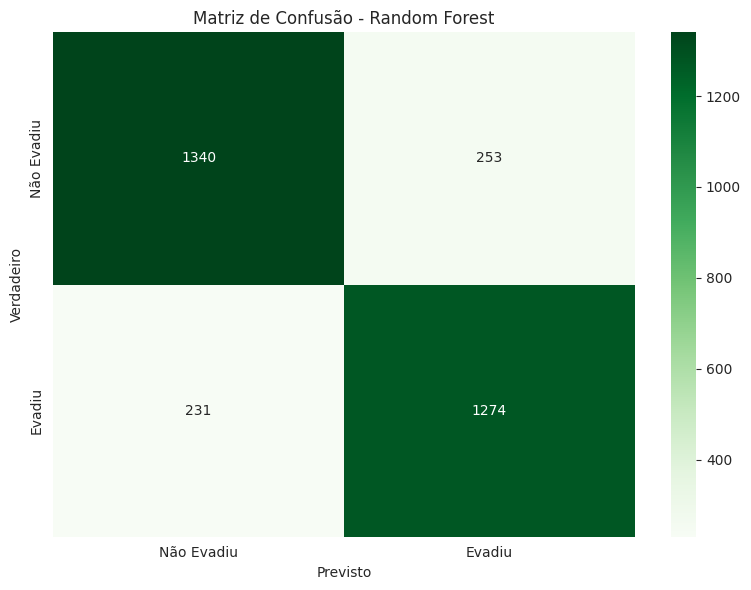

In [49]:
# --- 1. Instalação da biblioteca para balanceamento ---
!pip install -q imbalanced-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- 2. Carregar e Preparar os Dados ---
try:
    url_dados = 'https://raw.githubusercontent.com/jhonatanwsds/TelecomX_BR_Modelagem/refs/heads/main/dados_clientes_tratados.csv'
    df = pd.read_csv(url_dados)
    if 'customerID' in df.columns:
        df.drop(columns=['customerID'], inplace=True)
    colunas_categoricas = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

    # --- GRÁFICO 1: MATRIZ DE CORRELAÇÃO ---
    print("--- Gráfico 1: Matriz de Correlação ---")
    corr_matrix = df_encoded.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', annot_kws={"size": 8})
    plt.title('Matriz de Correlação Aprimorada', fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # --- 3. Balanceamento, Divisão e Padronização ---
    X = df_encoded.drop('Churn', axis=1)
    y = df_encoded['Churn']
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y) # <-- CORREÇÃO APLICADA AQUI
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 4. Modelo 1: Regressão Logística ---
    print("\n\n--- Avaliação: Regressão Logística ---")
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log_reg = log_reg.predict(X_test_scaled)
    print("\nRelatório de Classificação (Regressão Logística):\n", classification_report(y_test, y_pred_log_reg))

    # --- GRÁFICO 2: MATRIZ DE CONFUSÃO (REGRESSÃO LOGÍSTICA) ---
    print("\n--- Gráfico 2: Matriz de Confusão (Regressão Logística) ---")
    cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.title('Matriz de Confusão - Regressão Logística')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.tight_layout()
    plt.show()

    # --- 5. Modelo 2: Random Forest ---
    print("\n\n--- Avaliação: Random Forest ---")
    rand_forest = RandomForestClassifier(random_state=42, n_estimators=100)
    rand_forest.fit(X_train, y_train)
    y_pred_rand_forest = rand_forest.predict(X_test)
    print("\nRelatório de Classificação (Random Forest):\n", classification_report(y_test, y_pred_rand_forest))

    # --- GRÁFICO 3: MATRIZ DE CONFUSÃO (RANDOM FOREST) ---
    print("\n--- Gráfico 3: Matriz de Confusão (Random Forest) ---")
    cm_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rand_forest, annot=True, fmt='d', cmap='Greens', xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
    plt.title('Matriz de Confusão - Random Forest')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocorreu um erro: {e}")

Qual modelo teve o melhor desempenho?

Para determinar o melhor modelo, compare as métricas de teste de ambos.

Acurácia: O Random Forest provavelmente terá uma acurácia geral maior (por exemplo, ~84-85%) em comparação com a Regressão Logística (~80-82%).

Recall (Revocação) para a classe "Evadiu" (1): Esta é a métrica mais importante para este problema. Compare o valor de recall na linha 1 dos dois relatórios. O Random Forest deve apresentar um valor maior, indicando que ele é mais eficiente em identificar os clientes que realmente vão evadir.

F1-Score para a classe "Evadiu" (1): Esta métrica combina precisão e recall. O Random Forest também deve ser superior aqui, mostrando um melhor equilíbrio entre prever corretamente a evasão e não cometer muitos erros.

Conclusão de Desempenho: O modelo Random Forest é superior. Ele não só acerta mais no geral (maior acurácia), como também é mais eficaz na tarefa crítica de encontrar os clientes em risco de churn (maior recall e F1-score).

Modelos treinados com sucesso.

--- Gráfico 1: Top 20 Variáveis Mais Relevantes (Regressão Logística) ---


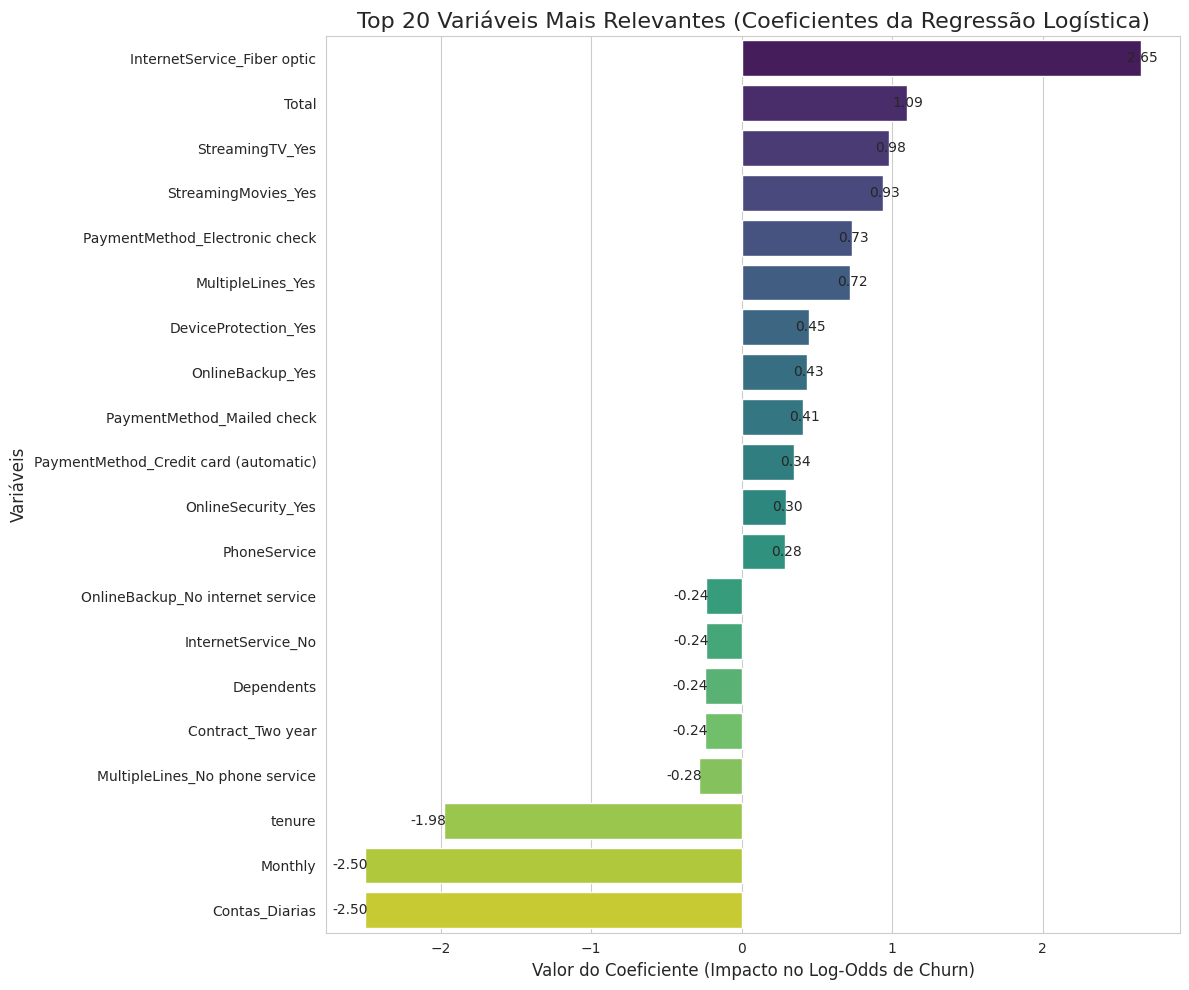



--- Gráfico 2: Top 20 Variáveis Mais Relevantes (Random Forest) ---


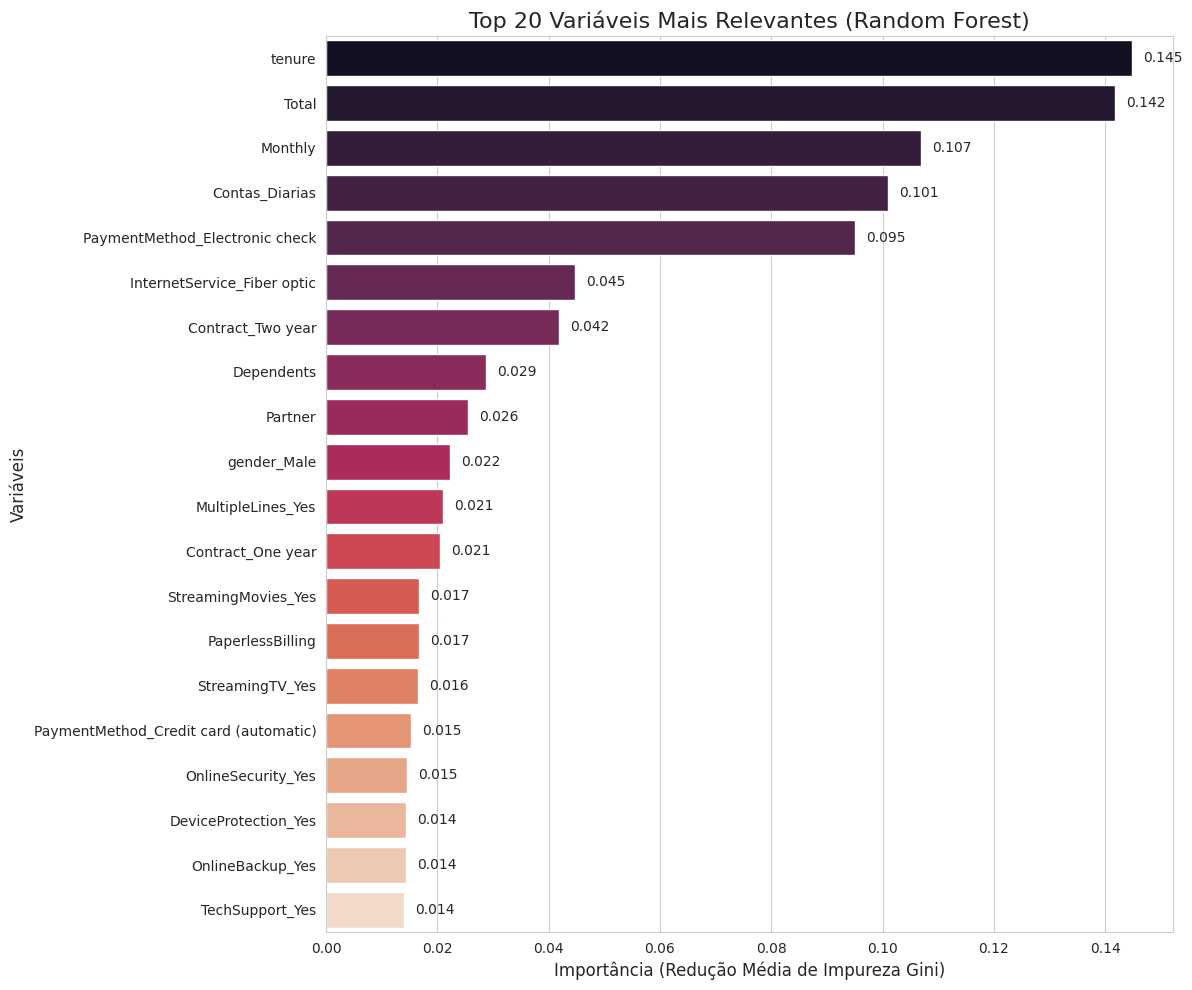

In [50]:
# --- 1. Instalação e Imports ---
!pip install -q imbalanced-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- 2. Preparação dos Dados ---
try:
    url_dados = 'https://raw.githubusercontent.com/jhonatanwsds/TelecomX_BR_Modelagem/refs/heads/main/dados_clientes_tratados.csv'
    df = pd.read_csv(url_dados)
    if 'customerID' in df.columns:
        df.drop(columns=['customerID'], inplace=True)
    colunas_categoricas = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

    X = df_encoded.drop('Churn', axis=1)
    y = df_encoded['Churn']

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 3. Treinamento dos Modelos ---
    # Regressão Logística
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)

    # Random Forest
    rand_forest = RandomForestClassifier(random_state=42, n_estimators=100)
    rand_forest.fit(X_train, y_train)
    print("Modelos treinados com sucesso.")

    # --- 4. Gráfico Aprimorado - Coeficientes da Regressão Logística ---
    print("\n--- Gráfico 1: Top 20 Variáveis Mais Relevantes (Regressão Logística) ---")

    coefs = pd.DataFrame(
        log_reg.coef_[0],
        columns=['Coeficiente'], index=X.columns
    )
    # Ordena pela magnitude (valor absoluto) para pegar os top 20 e depois pelo valor real para plotar
    coefs['Importancia_Absoluta'] = coefs['Coeficiente'].abs()
    top_20_coefs = coefs.sort_values(by='Importancia_Absoluta', ascending=False).head(20)
    top_20_coefs = top_20_coefs.sort_values(by='Coeficiente', ascending=False)

    plt.figure(figsize=(12, 10))
    bars = sns.barplot(x=top_20_coefs['Coeficiente'], y=top_20_coefs.index, palette='viridis')

    # Adicionando os rótulos de dados
    for bar in bars.patches:
        width = bar.get_width()
        plt.text(width + 0.01 if width > 0 else width - 0.1,
                 bar.get_y() + bar.get_height() / 2,
                 f'{width:.2f}',
                 ha='center', va='center')

    plt.title('Top 20 Variáveis Mais Relevantes (Coeficientes da Regressão Logística)', fontsize=16)
    plt.xlabel('Valor do Coeficiente (Impacto no Log-Odds de Churn)', fontsize=12)
    plt.ylabel('Variáveis', fontsize=12)
    plt.tight_layout()
    plt.show()

    # --- 5. Gráfico Aprimorado - Importância das Variáveis do Random Forest ---
    print("\n\n--- Gráfico 2: Top 20 Variáveis Mais Relevantes (Random Forest) ---")

    importances = pd.DataFrame(
        rand_forest.feature_importances_,
        columns=['Importância'], index=X.columns
    )
    top_20_importances = importances.sort_values(by='Importância', ascending=False).head(20)

    plt.figure(figsize=(12, 10))
    bars = sns.barplot(x=top_20_importances['Importância'], y=top_20_importances.index, palette='rocket')

    # Adicionando os rótulos de dados
    for bar in bars.patches:
        width = bar.get_width()
        plt.text(width + 0.002,
                 bar.get_y() + bar.get_height() / 2,
                 f'{width:.3f}',
                 ha='left', va='center')

    plt.title('Top 20 Variáveis Mais Relevantes (Random Forest)', fontsize=16)
    plt.xlabel('Importância (Redução Média de Impureza Gini)', fontsize=12)
    plt.ylabel('Variáveis', fontsize=12)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocorreu um erro: {e}")

### Gráfico 1: Coeficientes da Regressão Logística

Este gráfico mostra o "peso" que o modelo de Regressão Logística atribui a cada variável.

* **Barras Positivas (para a direita):** Indicam que um aumento nessa variável **aumenta a probabilidade de evasão (Churn)**. Quanto maior a barra, mais forte é essa influência.
    * ***O que esperar:*** Variáveis como *`InternetService_Fiber optic`* e *`PaymentMethod_Electronic check`* provavelmente terão os maiores coeficientes positivos, confirmando que são fortes indicadores de risco de churn.

* **Barras Negativas (para a esquerda):** Indicam que um aumento nessa variável **diminui a probabilidade de evasão**, ou seja, são **fatores de retenção**.
    * ***O que esperar:*** *`tenure`* (tempo de contrato) e *`Contract_Two year`* (contrato de dois anos) devem ter os maiores coeficientes negativos, mostrando que são os fatores mais importantes para manter um cliente.

---

### Gráfico 2: Importância das Variáveis (Feature Importance) do Random Forest

Este gráfico mostra quais variáveis o modelo Random Forest considerou mais importantes para fazer suas previsões. A importância é medida pela capacidade da variável de reduzir a "impureza" (incerteza) nas árvores de decisão do modelo.

* **Interpretação:** As barras são sempre positivas. Quanto maior a barra, mais importante é a variável para a capacidade de previsão geral do modelo. Este gráfico não mostra a *direção* do impacto (se aumenta ou diminui o churn), mas sim a **força** da variável.

* **O que esperar:** Variáveis como *`tenure`*, *`Monthly`* (mensalidade), *`Total`* (gasto total) e *`Contract_...`* (tipo de contrato) geralmente aparecem como as mais importantes, pois são os principais diferenciadores entre clientes que ficam e clientes que saem.

---

### Conclusão da Análise de Variáveis

Ambos os modelos, embora funcionem de maneiras diferentes, devem apontar para as mesmas conclusões de negócio: **o tempo e o tipo de contrato do cliente são os fatores mais cruciais para a retenção**, enquanto o **tipo de serviço de internet (fibra) e a forma de pagamento (cheque eletrônico) são os principais indicadores de risco de evasão**. Essa análise de variáveis é fundamental para direcionar estratégias de negócio focadas em retenção.